# Brusselator

El Brusselator es un modelo teórico para un tipo de _reacción autocatalítica_. Se dice que una reacción química única es autocatalítica si uno de los productos de reacción es también un catalizador para la misma reacción o una reacción acoplada. El modelo Brusselator fue propuesto por Ilya Priogine y sus colaboradores de la Universidad Libre de Bruselas. Es un arónimo en inglés de _Brussels_ ('Bruselas') y _oscillator_ ('oscilador').

__¿Quién?__

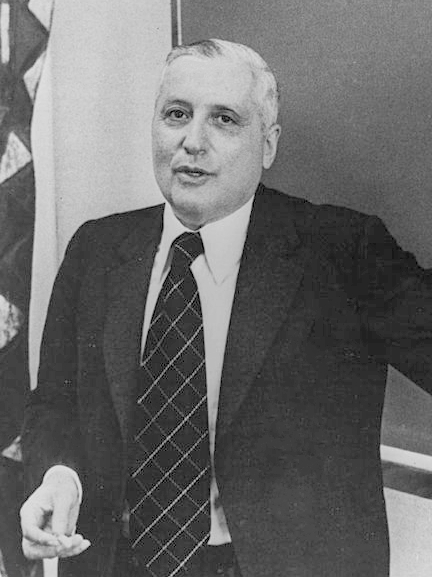

Ilya Prigogine fue un físico, químico, sistémico y catedrático universitario de origen ruso, nacionalizado belga. En 1977 fue galardonado con el Premio Nobel de Química por sus investigaciones que lo llevaron a crear el concepto, en 1967, de estructuras disipativas.

Prigogine piensa en tres exigencias para la física -irreversibilidad, probabilidad y coherencia - para poder concebir un universo evolutivo, para concebir las condiciones para la existencia de nuevas estructuras alejadas del equilibrio.

__Objetivo__

El objetivo de este trabajo es implementar el modelo de reacción-difusión Brusselator en dos dimensiones, que se utiliza a menudo para estudiar sistemas químicos y biológicos complejos. El modelo es un sistema no lineal de ecuaciones diferenciales parciales y fue propuesto en 1968 por Ilya Prigogine y sus colaboradores de la Universidad Libre de Bruselas. Desde entonces se ha aplicado para analizar reacciones oscilatorias y autocatalíticas. El método informático utilizado para implementar el modelo fue el método FTCS (Forward Time Centered Space).

__Modelo de Brusselator__

El estudio de sistemas químicos y biológicos a menudo requiere el uso de modelos que caracterizan las reacciones de reacción-difusión. Uno de los modelos más utilizados es el modelo de Brusselator, que se utiliza para describir el mecanismo químico de reacción-difusión con oscilaciones no lineales. Turing observó que cuando ciertas reacciones se asocian con la difusión, es posible obtener un patrón espacial estable, y esto conduce a la teoría de la morfogénesis. Además de los procesos de reacción-difusión, el modelo Brusselator se observa en reacciones enzimáticas y en la física de plasma y láser.

El mecanismo de Brusselator propuesto por Prigogine es dado por:

$A\to U$

$B+U\to V+D$

$2U+V\to 3U$

$U\to E$

Donde $U$ y $V$ son las especies químicas de interés. Asumimos $A$ y $B$ en exceso para que el sistema no alcance el estado de equilibrio. Este sistema químico fue importante para el avance en el área de sistemas complejos porque permite el uso de modelos matemáticos de dos dimensiones, ya que $U$ y $V$ son variables dependientes, y admite oscilaciones de ciclo límite.

Las ecuaciones diferenciales asociadas con el sistema Brusselator son dados por:

$\begin{cases}
\frac{du}{dt}=a+u^2v-(b+1)u \\
\frac{dv}{dt}=bu-u^2v
\end{cases}$

donde:

1. $u$ y $v$ son las concentraciones a investigar en función del tiempo y el espacio.
2. $a$ y $b$ son constantes relativas a las concentraciones de los reactivos $A$ y $B$.

La solución analítica del sistema de reacción-difusión Brusselator aún no se conoce, por lo que existe el interés de explorarla numéricamente.

__Análisis de la estabilidad__

_Análisis del punto crítico_

Considerando el sistema de libre difusión, encontramos los puntos críticos del sistema igualando las derivadas a cero. Obtenemos que el único punto crítico es $(u*,v*)=(a, \frac{b}{a})$. La matriz jacobiana $J^*$ en el punto crítico $(u^*,v^*)$ es dada por

$J=\begin{pmatrix}
b-1 & a^2 \\
-b & -a^2
\end{pmatrix}$

Los eigenvalores de $J^*$ son los valores $\lambda$ que satsifacen la ecuación característica

$\lambda^2+(1-b+a^2)\lambda+a^2=0$

Los valores mismos muestran claramente la dependencia de $1-b+a^2$ y no determinante $(1-b+a^2)^2-4a^2$. Estos valores autos gobiernan la estabilidad del punto crítico y determinan la existencia de un ciclo límite. Como se discutió en Twizell, cuando $Re(\lambda)<0$ el sistema es estable y no hay límite de ciclo. Ya para $0<Re(\lambda)$ el sistema es inestable y hay un ciclo límite.

_Análisis del punto fijo_

Todavía en Twizell, se realizo el análisisdel punto fijo. El único punto fijo encontrado es $(u^*,v^*)=(a,\frac{b}{a})$. Manipulando la matriz jacobiana en este punto y analizando los eigenvalores, se obtiene que la solución es atraída hacia el punto $(a, \frac{b}{a})$ y $0<1-b+a^2$. De lo contrario, la solución no converge.

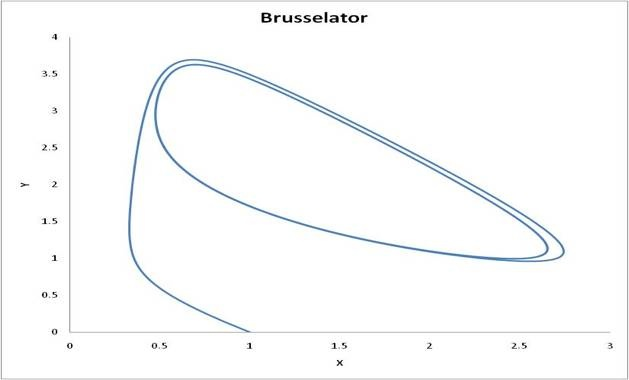 El Brusselator en el régimen inestable de parámetros $A=1, B=2.5; X(0)=1, Y(0)=0$. El sistema se aproxima a un ciclo límite. Para $B<1+A$ el sistema es estable y se aproxima a un punto fijo.

Puntos críticos y su clasificación:

Punto crítico: (1, 3)
Traza: 1
Determinante: 1
Discriminante: -3
Tipo: Región II (Foco inestable)
Clasificación: No tiene clasificación


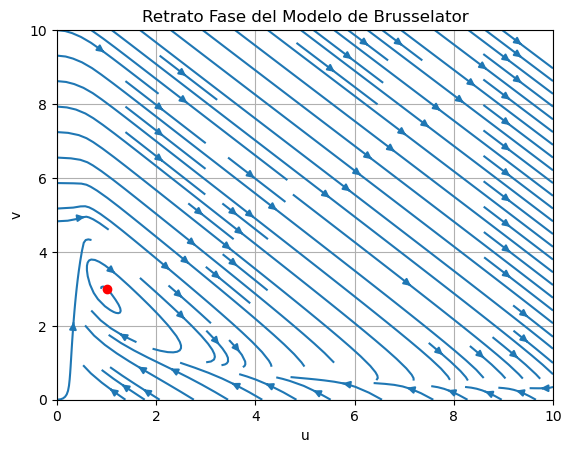

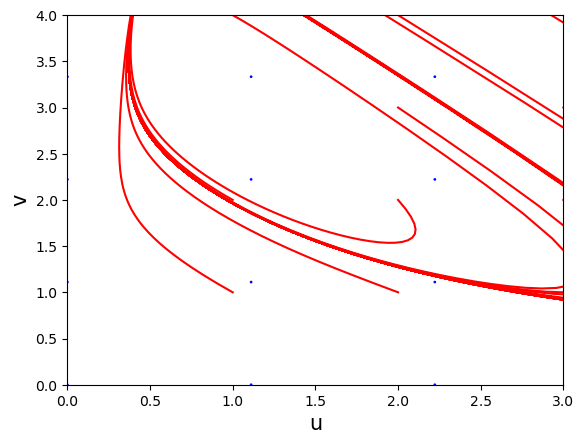

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir símbolos y parámetros
u, v = sp.symbols('u v')
a, b = 1, 3  # Parámetros del modelo

# Definir las ecuaciones del modelo de Brusselator
du_dt = a + u**2 * v - (b + 1) * u
dv_dt = b * u - u**2 * v

# Encontrar los puntos críticos
critical_points = sp.solve([du_dt, dv_dt], (u, v))

# Matriz Jacobiana
jacobi_matrix = sp.Matrix([[du_dt.diff(var) for var in (u, v)],
                           [dv_dt.diff(var) for var in (u, v)]])

# Función discriminante
def discriminant(J):
    return J.trace()**2 - 4 * J.det()

# Función para determinar el tipo de punto fijo
def tipo(matrix):
    t = matrix.trace()
    d = matrix.det()
    disc = discriminant(matrix)
    
    if t > 0 and d > 0 and disc > 0:
        return "Región I (Nodo inestable)"
    elif t > 0 and d > 0 and disc < 0:
        return "Región II (Foco inestable)"
    elif t < 0 and d > 0 and disc < 0:
        return "Región III (Foco estable)"
    elif t < 0 and d > 0 and disc > 0:
        return "Región IV (Nodo estable)"
    elif d < 0 and disc < 0:
        return "Región V (Silla de montar)"
    else:
        return "Degenerado"

# Clasificar la estabilidad del punto fijo
def clas(matrix):
    t = matrix.trace()
    d = matrix.det()
    
    if t < 0 and d > 0:
        return "El punto fijo es estable y atractivo"
    elif t <= 0 and d > 0:
        return "El punto fijo es estable"
    elif t > 0 and d < 0:
        return "El punto fijo es inestable"
    else:
        return "No tiene clasificación"

# Evaluación en puntos críticos y clasificación
print("Puntos críticos y su clasificación:")
for point in critical_points:
    J = jacobi_matrix.subs({u: point[0], v: point[1]})
    tr = J.trace()
    det = J.det()
    disc = discriminant(J)
    
    print(f"\nPunto crítico: {point}")
    print(f"Traza: {tr}")
    print(f"Determinante: {det}")
    print(f"Discriminante: {disc}")
    print(f"Tipo: {tipo(J)}")
    print(f"Clasificación: {clas(J)}")

# Retrato fase del modelo de Brusselator
def brusselator(X, t, a, b):
    u, v = X
    dudt = a + u**2 * v - (b + 1) * u
    dvdt = b * u - u**2 * v
    return [dudt, dvdt]

u_range = np.linspace(0, 10, 20)
v_range = np.linspace(0, 10, 20)
U, V = np.meshgrid(u_range, v_range)
dU_dt = np.array([[du_dt.subs({u: u_val, v: v_val}) for u_val in u_range] for v_val in v_range], dtype=float)
dV_dt = np.array([[dv_dt.subs({u: u_val, v: v_val}) for u_val in u_range] for v_val in v_range], dtype=float)

fig, ax = plt.subplots()
ax.streamplot(U, V, dU_dt, dV_dt, density=1)
for point in critical_points:
    ax.plot(point[0], point[1], 'ro')
plt.xlabel('u')
plt.ylabel('v')
plt.title('Retrato Fase del Modelo de Brusselator')
plt.grid()
plt.show()

# Graficar trayectorias del sistema de Brusselator
def grafica(brusselator):
    ts = np.linspace(0, 50, 1000)
    ic = np.linspace(1, 5, 5)
    for r in ic:
        for s in ic:
            x0 = [r, s]
            xs = odeint(brusselator, x0, ts, args=(a, b))
            plt.plot(xs[:, 0], xs[:, 1], "r-")

    plt.xlabel('u', fontsize=15)
    plt.ylabel('v', fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlim(0, 3)
    plt.ylim(0, 4)

    U_vals, V_vals = np.mgrid[0:10:10j, 0:10:10j]
    dU = np.array([[du_dt.subs({u: U_vals[i, j], v: V_vals[i, j]}) for j in range(10)] for i in range(10)], dtype=float)
    dV = np.array([[dv_dt.subs({u: U_vals[i, j], v: V_vals[i, j]}) for j in range(10)] for i in range(10)], dtype=float)
    plt.quiver(U_vals, V_vals, dU, dV, color='b')
    plt.show()

# Ejecutar la gráfica de trayectorias
grafica(brusselator)

__Simulación__

En las siguientes figuras tenemos la variación de las concentraciones de los reactivos a lo largo del tiempo y los diagramas de fase. Para $a=1$ y $b=1.7$ notamos que la solución del sistema converge a $u(t)=1$ y $v(t)=1.7$. Este resultado está de acuerdo con lo esperadio, ya que el punto $(1, 1.7)$ es un punto fijo atraedor (satisface $1-b+a^2>0$), como se discute en la sección de análisis de estabilidad de Brusselator. También notamos, por el diagrama de fase, que incluso cambiando las condiciones iniciales del problema, la solución converge al estado estacionario.

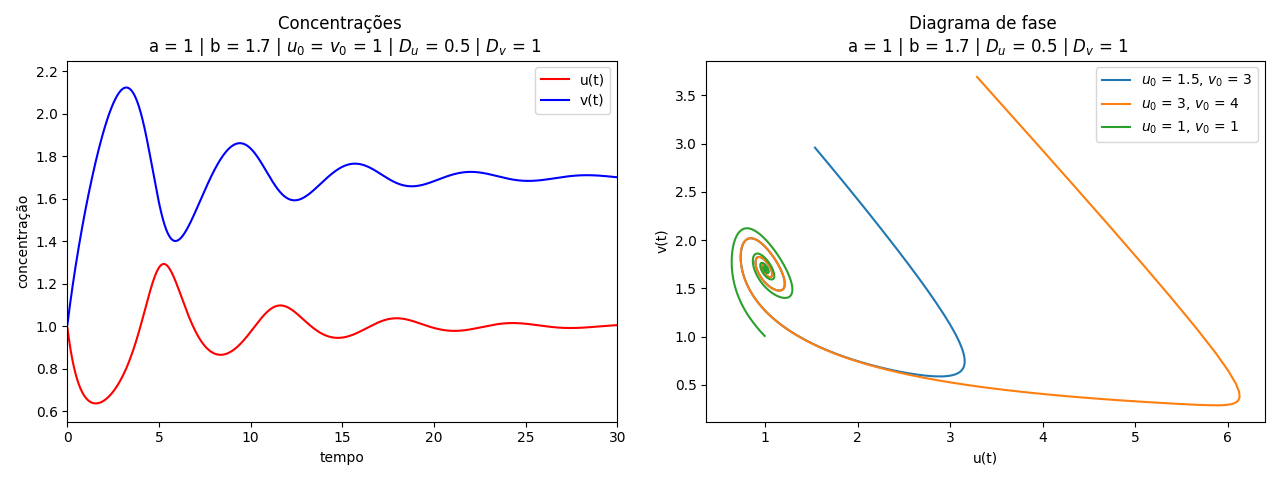

Para $a=1$ y $b=3$, tenemos que $0>1-b+a^2$, por lo que la solución del sistema no converge. Lo que observamos es un comportamiento peródico causado por la existencia del ciclo límite.

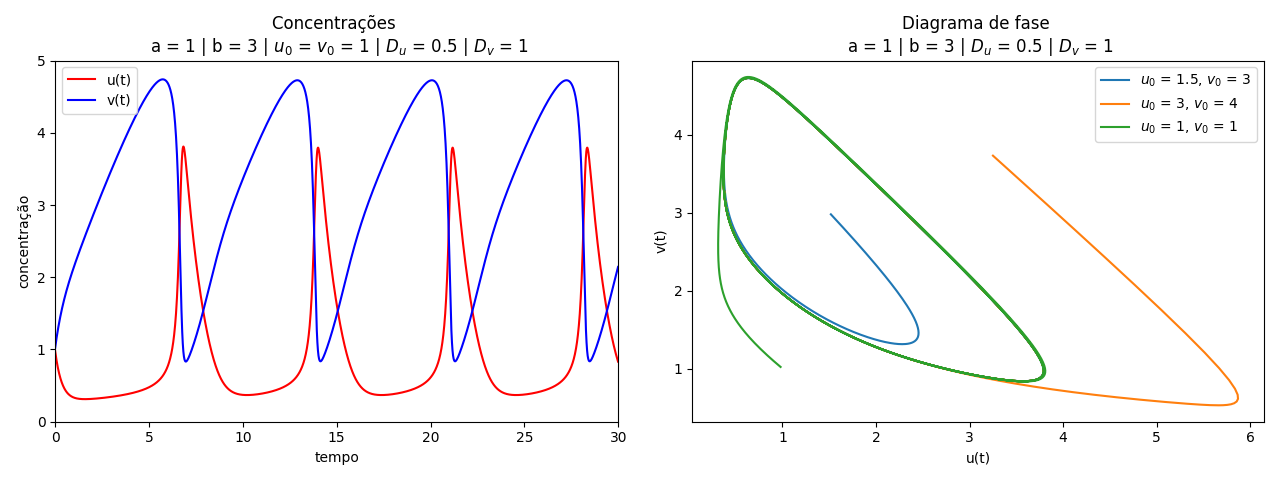

Podemos pensar que en las funciones de concentración $U$ y $V$ como ondas que sufren interferencias destructivas, ya que están fuera de la fase. La siguiente animación muestra este comportamiento, observe el reactivo $U$, representado por el color amarillo, en el gráfico de la derecha. Tenga en cuenta que cuando el punto del gráfico de la izquierda alcanza el mínimo local, el valor de $U$ es alto y el valor de $V$ demasiado bajo, haciendo que el gráfico de la derecha se vuelva demasiado amarillo.

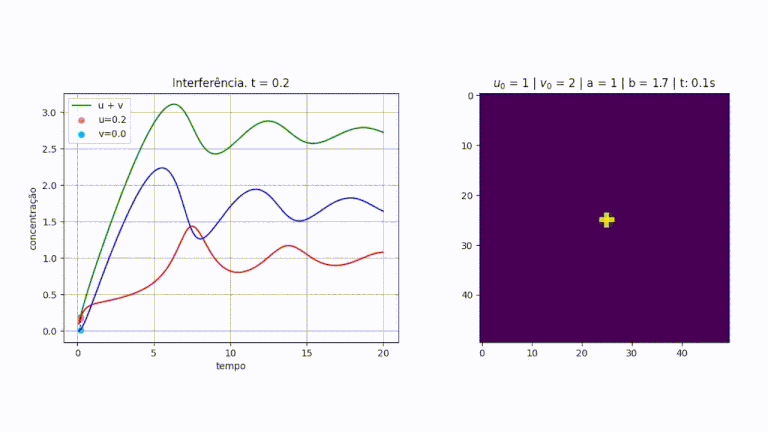

Es interesante pensar en el gráfico de la izquierda como el análisis en un punto específico dentro del contenedor, por ejemplo, $N_x=N_y=50$ estamos analizando el punto $(10, 10)$. Teniendo esto en cuenta, podemos analizar las otras tres esquinas de la figura, ya que, por simetría de la oposición inicial elegida, las esquinas son iguales.

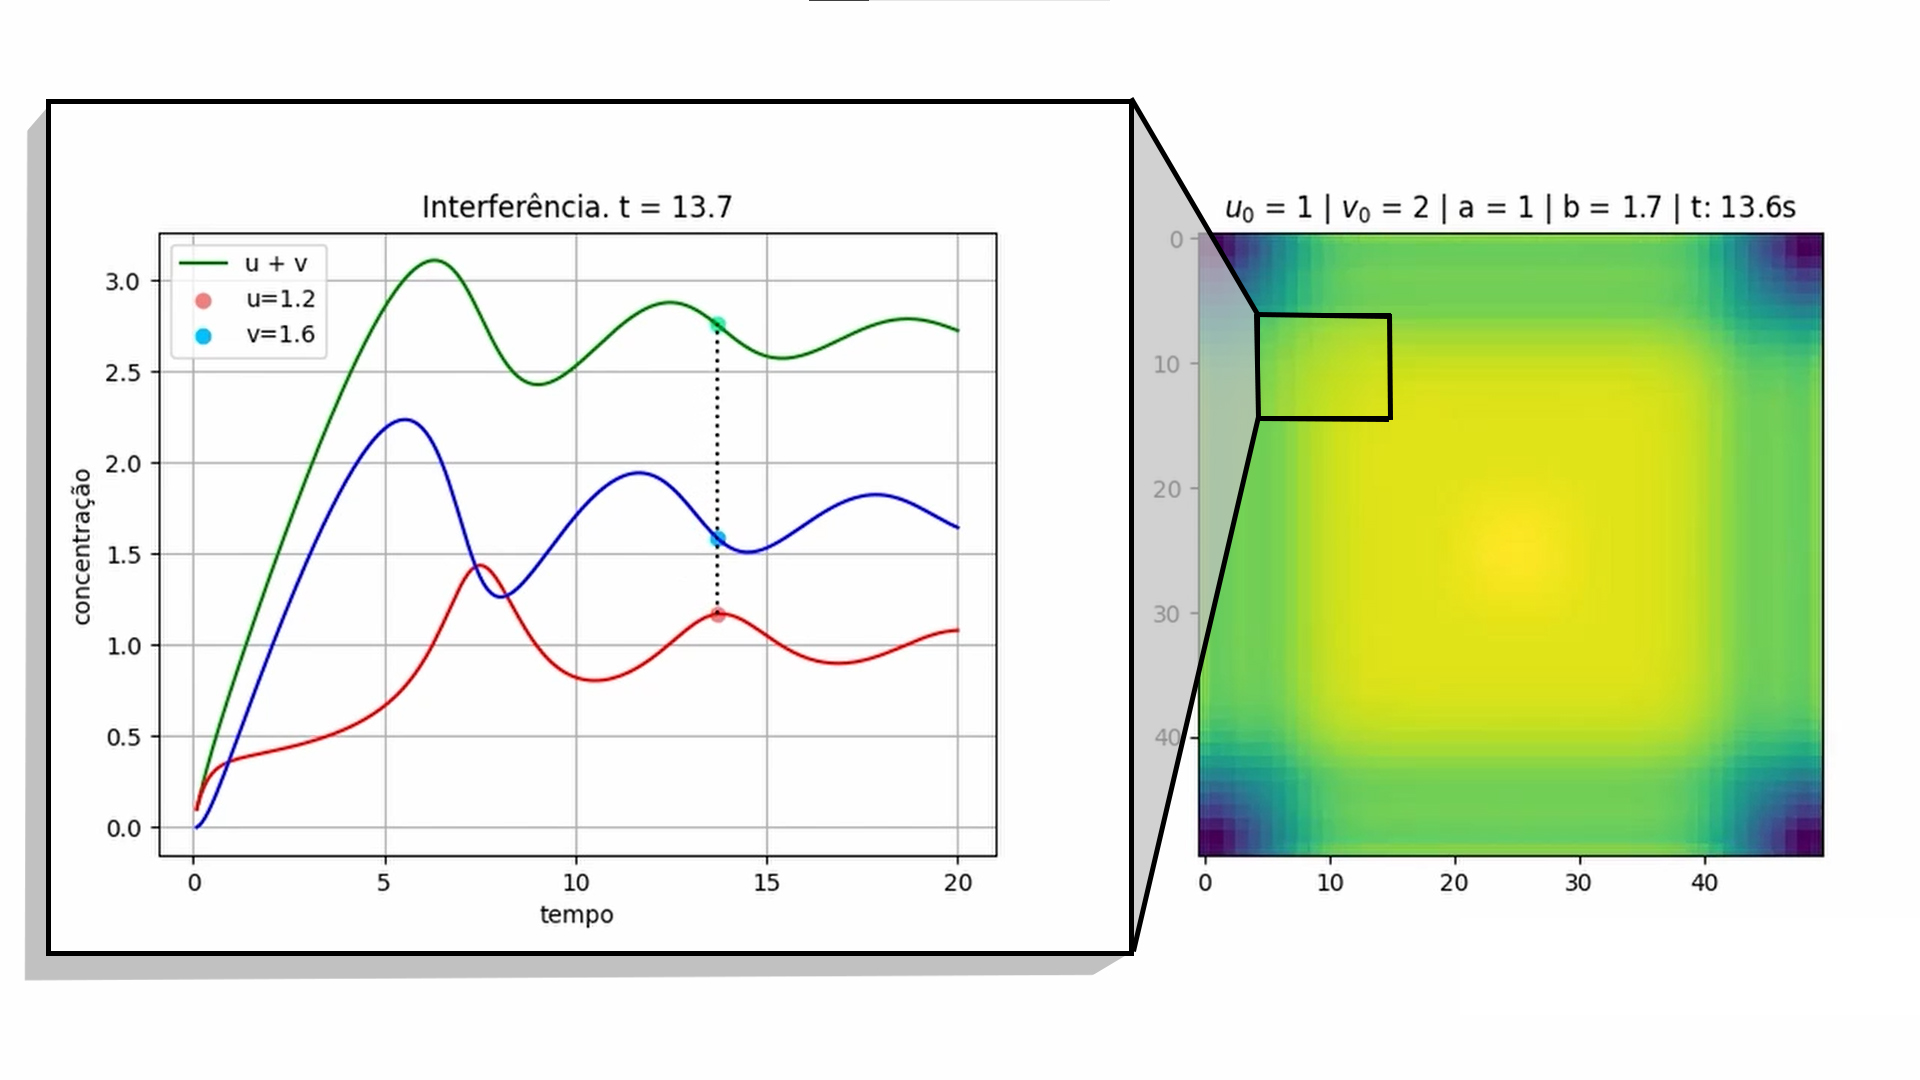

__REFERENCIAS__

https://fiscomp.if.ufrgs.br/index.php/Modelo_Brusselator_de_Reação-Difusão 